## Lab 2.9: Data Merging, Case 1
### 1. Merge the Datasets

I'll be using a Left join to include all employees from employees.csv even if some are missing in employee_details.csv.

Left Join:
     ID     Name Department  Salary   Join Date  Age Gender
0    1    Alice         HR   55000  2019-03-12   28      F
1    2      Bob         IT   70000  2018-06-21   34      M
2    3  Charlie         IT   72000  2020-05-15   36      M
3    4    David         HR   50000  2017-11-01   41      M
4    5      Eva  Marketing   68000  2020-08-10   29      F
5    6    Frank    Finance   80000  2016-09-30   45      M
6    7    Grace  Marketing   65000  2021-02-12   27      F
7    8   Hannah         IT   73000  2019-10-25   33      F
8    9      Ian         IT   72000  2020-01-13   40      M
9   10    Jenny  Marketing   66000  2018-07-19   31      F
10  11      Ken    Finance   85000  2017-12-03   46      M
11  12    Laura         HR   58000  2021-05-07   30      F
12  13  Michael         IT   73000  2021-06-18   35      M
13  14   Nathan         IT   70000  2019-04-23   38      M
14  15   Olivia  Marketing   67000  2018-10-02   32      F


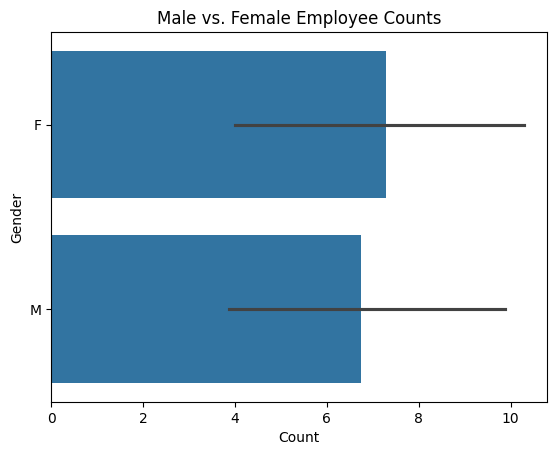

In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

employees = pd.read_csv('data/employees.csv')
employee_details = pd.read_csv('data/employee_details.csv')

# Left join
left_join = pd.merge(employees, employee_details, on='ID', how='left')
print("Left Join:\n", left_join)

sns.barplot(left_join['Gender'])
plt.title("Male vs. Female Employee Counts")
plt.xlabel("Count")
plt.ylabel("Gender")
plt.show()


### 2. Left Join Example
There are no employees that are missing age/gender information in these datasets.

Gender
M    8
F    7
Name: count, dtype: int64


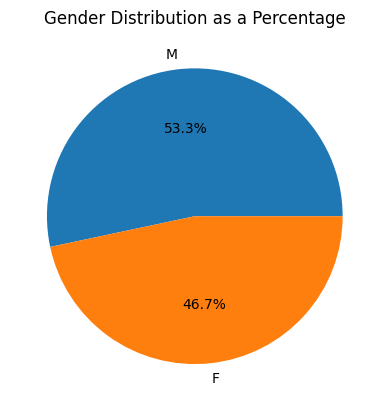

In [62]:
gender_counts = left_join['Gender'].value_counts()
print(gender_counts)

plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title("Gender Distribution as a Percentage")
plt.show()

### 3. Derived Variable

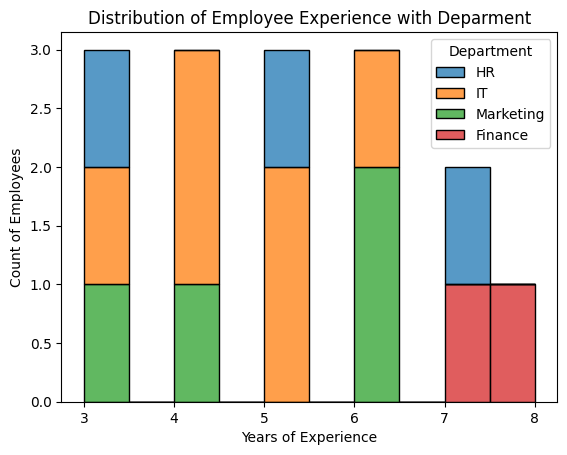

In [63]:
# variable for current year
current_year = 2024

# convert to dateTime
left_join['Join Date'] = pd.to_datetime(left_join['Join Date'])

# derived column 'Experience'
left_join['Experience'] = current_year - left_join['Join Date'].dt.year

sns.histplot(left_join, x='Experience', hue='Department', multiple='stack', bins=10)
plt.title("Distribution of Employee Experience with Deparment")
plt.xlabel("Years of Experience")
plt.ylabel("Count of Employees")
plt.show()

### 4. Synthetic Variable (Binning)

In [64]:
bins = [20, 30, 40, 100]
labels = ['Young', 'Mid-aged', 'Senior']
left_join['Age Group'] = pd.cut(left_join['Age'], bins=bins, labels=labels)
print("Age Groups:\n",left_join[['Name', 'Age Group']])

Age Groups:
        Name Age Group
0     Alice     Young
1       Bob  Mid-aged
2   Charlie  Mid-aged
3     David    Senior
4       Eva     Young
5     Frank    Senior
6     Grace     Young
7    Hannah  Mid-aged
8       Ian  Mid-aged
9     Jenny  Mid-aged
10      Ken    Senior
11    Laura     Young
12  Michael  Mid-aged
13   Nathan  Mid-aged
14   Olivia  Mid-aged


### 5. Aggregation & Grouping

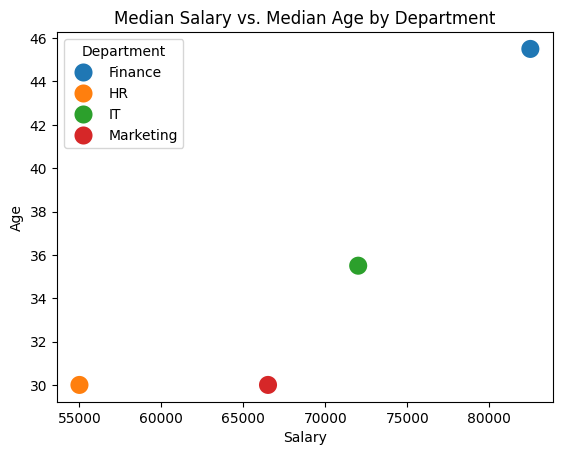

In [65]:
# average salary by department
department_salary = left_join.groupby('Department')['Salary'].median().reset_index()

# average age by department
department_age = left_join.groupby('Department')['Age'].median().reset_index()

# new DataFrame with both averages for scatterplot
department_averages = pd.merge(department_salary, department_age, on = 'Department')

# scatterplot
sns.scatterplot(department_averages, x='Salary', y='Age', hue='Department', s=200)
plt.title('Median Salary vs. Median Age by Department')
plt.xlabel('Salary')
plt.ylabel('Age')
plt.show()

### 6. Outlier Detection

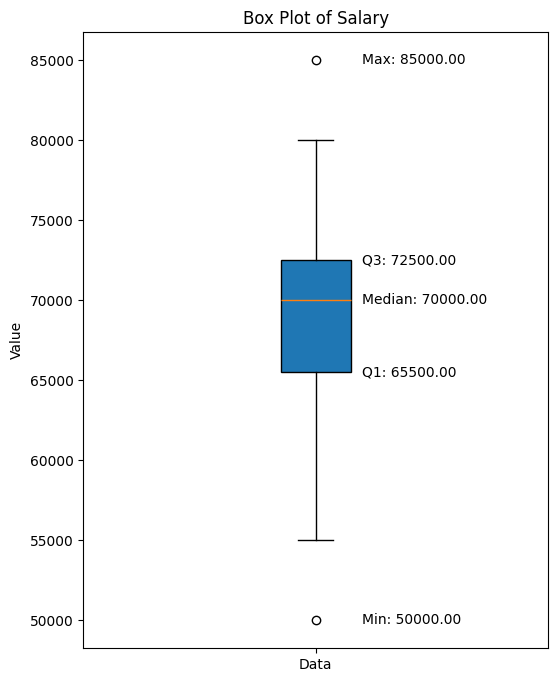

In [71]:
# Calculate the five-number summary
minimum = np.min(left_join['Salary'])
q1 = np.percentile(left_join['Salary'], 25)
median = np.median(left_join['Salary'])
q3 = np.percentile(left_join['Salary'], 75)
maximum = np.max(left_join['Salary'])

# Create a vertical box plot
plt.figure(figsize=(6, 8))
box = plt.boxplot(left_join['Salary'], vert=True, patch_artist=True)

# Annotate the five-number summary on the plot
plt.text(1.1, minimum, f'Min: {minimum:.2f}', ha='left', va='center')
plt.text(1.1, q1, f'Q1: {q1:.2f}', ha='left', va='center')
plt.text(1.1, median, f'Median: {median:.2f}', ha='left', va='center')
plt.text(1.1, q3, f'Q3: {q3:.2f}', ha='left', va='center')
plt.text(1.1, maximum, f'Max: {maximum:.2f}', ha='left', va='center')

# Additional plot details
plt.title("Box Plot of Salary")
plt.ylabel("Value")
plt.xticks([1], ['Data'])
plt.show()


### 7. Joining with Missing Data

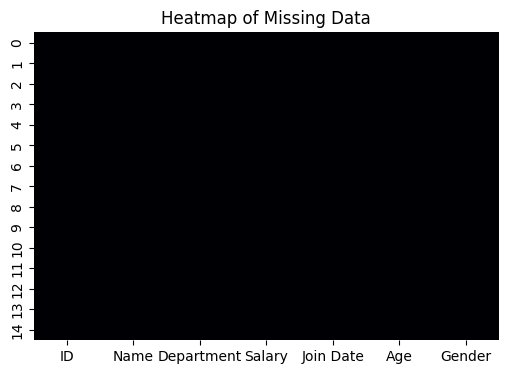

In [74]:
# outer join
outer_join = pd.merge(employees, employee_details, on='ID', how='outer')

# heatmap - shows there's no missing dat
plt.figure(figsize=(6,4))
sns.heatmap(outer_join.isnull(), cbar=False, cmap="inferno")
plt.title("Heatmap of Missing Data")
plt.show()
